## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть на TF с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией TF.</li>
</ol>

In [332]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [333]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [334]:
from keras.utils import to_categorical

### Импортируем Fashion MNIST датасет

In [335]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [336]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Анализ датасета 

In [337]:
train_images.shape

(60000, 28, 28)

In [338]:
len(train_labels)

60000

In [339]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [340]:
test_images.shape

(10000, 28, 28)

In [341]:
len(test_labels)

10000

### Preprocess the data

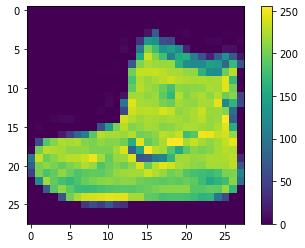

In [342]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [343]:
train_images = train_images / 255.0 - 0.5

test_images = test_images / 255.0 - 0.5

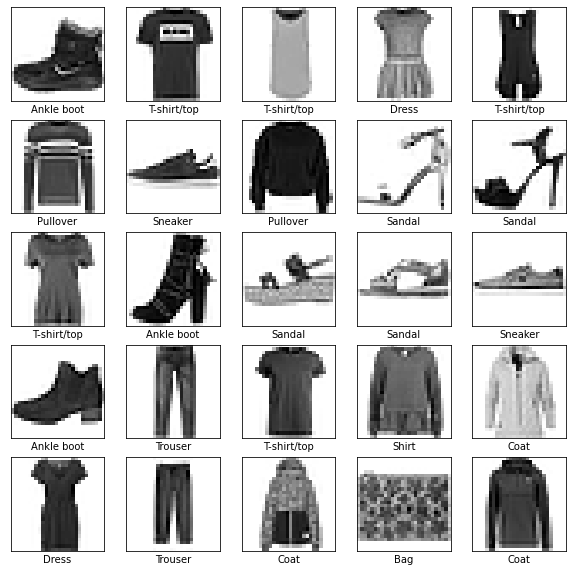

In [344]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Построение модели

In [345]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10)
])

In [346]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.1)

In [347]:
#callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [348]:
model.compile(#optimizer='adam',
              optimizer= tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [349]:
batch_size = 512

### Тренировка модели

In [350]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        print(' Learning rate: {:10.9f}'.format(self.model.optimizer._decayed_lr(tf.float32)))

In [351]:
model.fit(train_images, 
          train_labels, 
          epochs=20,
          batch_size=batch_size,
          validation_data=(test_images, test_labels),
          callbacks=[MyCustomCallback()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.5377 - accuracy: 0.8260 - val_loss: 0.7167 - val_accuracy: 0.7786
Epoch 2/20
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3459 - accuracy: 0.8783 - val_loss: 0.4514 - val_accuracy: 0.8367
Epoch 3/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2945 - accuracy: 0.8963 - val_loss: 0.3981 - val_accuracy: 0.8601
Epoch 4/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2623 - accuracy: 0.9057 - val_loss: 0.3638 - val_accuracy: 0.8702
Epoch 5/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2348 - accuracy: 0.9158 - val_loss: 0.3332 - val_accuracy: 0.8826
Epoch 6/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2090 - accuracy: 0.9263 - val_loss: 0.3219 - val_accuracy: 0.8869
Epoch 7/20
60000/60000 [==========================

### Предсказания нейросети

In [352]:
# Evaluate the model.
results = model.evaluate(
    test_images,
    test_labels,
    batch_size=batch_size
)

print('Test loss: {:10.4f}\nTest accuracy {:7.4f}'.format(results[0], results[1]))

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3282 - accuracy: 0.8898
Test loss:     0.3282
Test accuracy  0.8898


In [331]:
# Выводы по работе:
# уменьшение learning_rate в зависимости от шага уменьшило итоговую ошибку, так как модель 
# может погрузиться глубже в локальный минимум функции потерь;
# использование BatchNormalization увеличивает скорость сходимости, так как данные представлены в одном и том же масштабе;
# увеличение числа слоев повысило точность, так как модель смогла выявлять более сложные паттерны в данных;
# в документации изучен класс MyCustomCallback, который позволяет выводить различную информацию в процессе обучения.